In [26]:
import pandas as pd
import numpy as np
import matplotlib

In [27]:
returns = pd.read_csv("/Users/nicholasconant-hiley/Downloads/data/Portfolios_Formed_on_ME_monthly_EW.csv",
                     header=0, index_col=0, parse_dates=True,na_values=-99.99
                     )

In [28]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [29]:
#isolate column needed

In [30]:
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [ ]:
#chnage to percentage - 3.29 = 0.0320

In [31]:
returns = returns/100 
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [ ]:
#rename columns with names

In [7]:
returns.columns = ['SmallCap', 'LargerCap']
returns.head()

,SmallCap,LargerCap
192607,-0.000145,0.000329
192608,0.000512,0.000370
192609,0.000093,0.000067
192610,-0.000484,-0.000243
192611,-0.000078,0.000270


<AxesSubplot:>

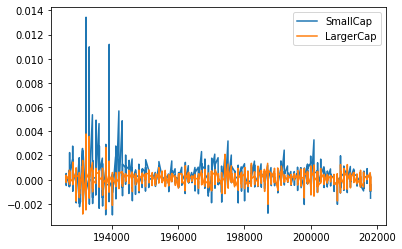

In [8]:
returns.plot.line()

In [10]:
returns.std()

SmallCap     0.001063
LargerCap    0.000539
dtype: float64

In [12]:
returns

,SmallCap,LargerCap
192607,-0.000145,0.000329
192608,0.000512,0.000370
192609,0.000093,0.000067
192610,-0.000484,-0.000243
192611,-0.000078,0.000270
...,...,...
201808,0.000241,0.000234
201809,-0.000168,0.000087
201810,-0.001002,-0.000657
201811,-0.000365,0.000253


In [38]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

Lo 10    0.012986
Hi 10    0.007423
dtype: float64

In [32]:
#annualized vol = standard deviation of retunrs * square root of 12

In [33]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

Lo 10    0.368193
Hi 10    0.186716
dtype: float64

In [ ]:
#1+R format

In [39]:
annualzied_returns = (return_per_month+1)**12 -1
annualzied_returns

Lo 10    0.167463
Hi 10    0.092810
dtype: float64

In [ ]:
# annualized return return compounded ^12 / n months

In [40]:
annualzied_returns/annualized_vol

Lo 10    0.454825
Hi 10    0.497063
dtype: float64

In [41]:
riskfree_rate = 0.03
excess_return = annualzied_returns - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

Lo 10    0.373346
Hi 10    0.336392
dtype: float64

In [ ]:
#small caps stocks give slightly better risk adjusted return over large cap stocks